# **Mount the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Clone the YOLOv9 repo**

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q
!pip install roboflow


# **Download the dataset for training**

In [ ]:
from roboflow import Roboflow
from IPython.display import Image

rf = Roboflow(api_key="FgeehcxWkzz94oos3m3L")
project = rf.workspace("instituto-superior-de-engenharia-de-coimbra-bgn4r").project("gun-surveilence-v2")
dataset = project.version(1).download("yolov9")

# **Download model weight for training**

In [ ]:
!wget https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

# **Train your Custom Model**

In [4]:
!python train.py \
--batch 16 --epochs 20 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/Gun-Surveilence-V2-1/data.yaml \
--weights /content/yolov9/gelan-c.pt \
--cfg /content/yolov9/models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

2024-02-26 13:23:32.159894: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 13:23:32.159963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 13:23:32.161923: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 13:23:33.386672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/gelan-c.pt, cfg=/content/yolov9/models/detect/gelan-c.yaml, data=/content/yolov9/Gun-Surveilence-V2-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=

# **Visualize training results**

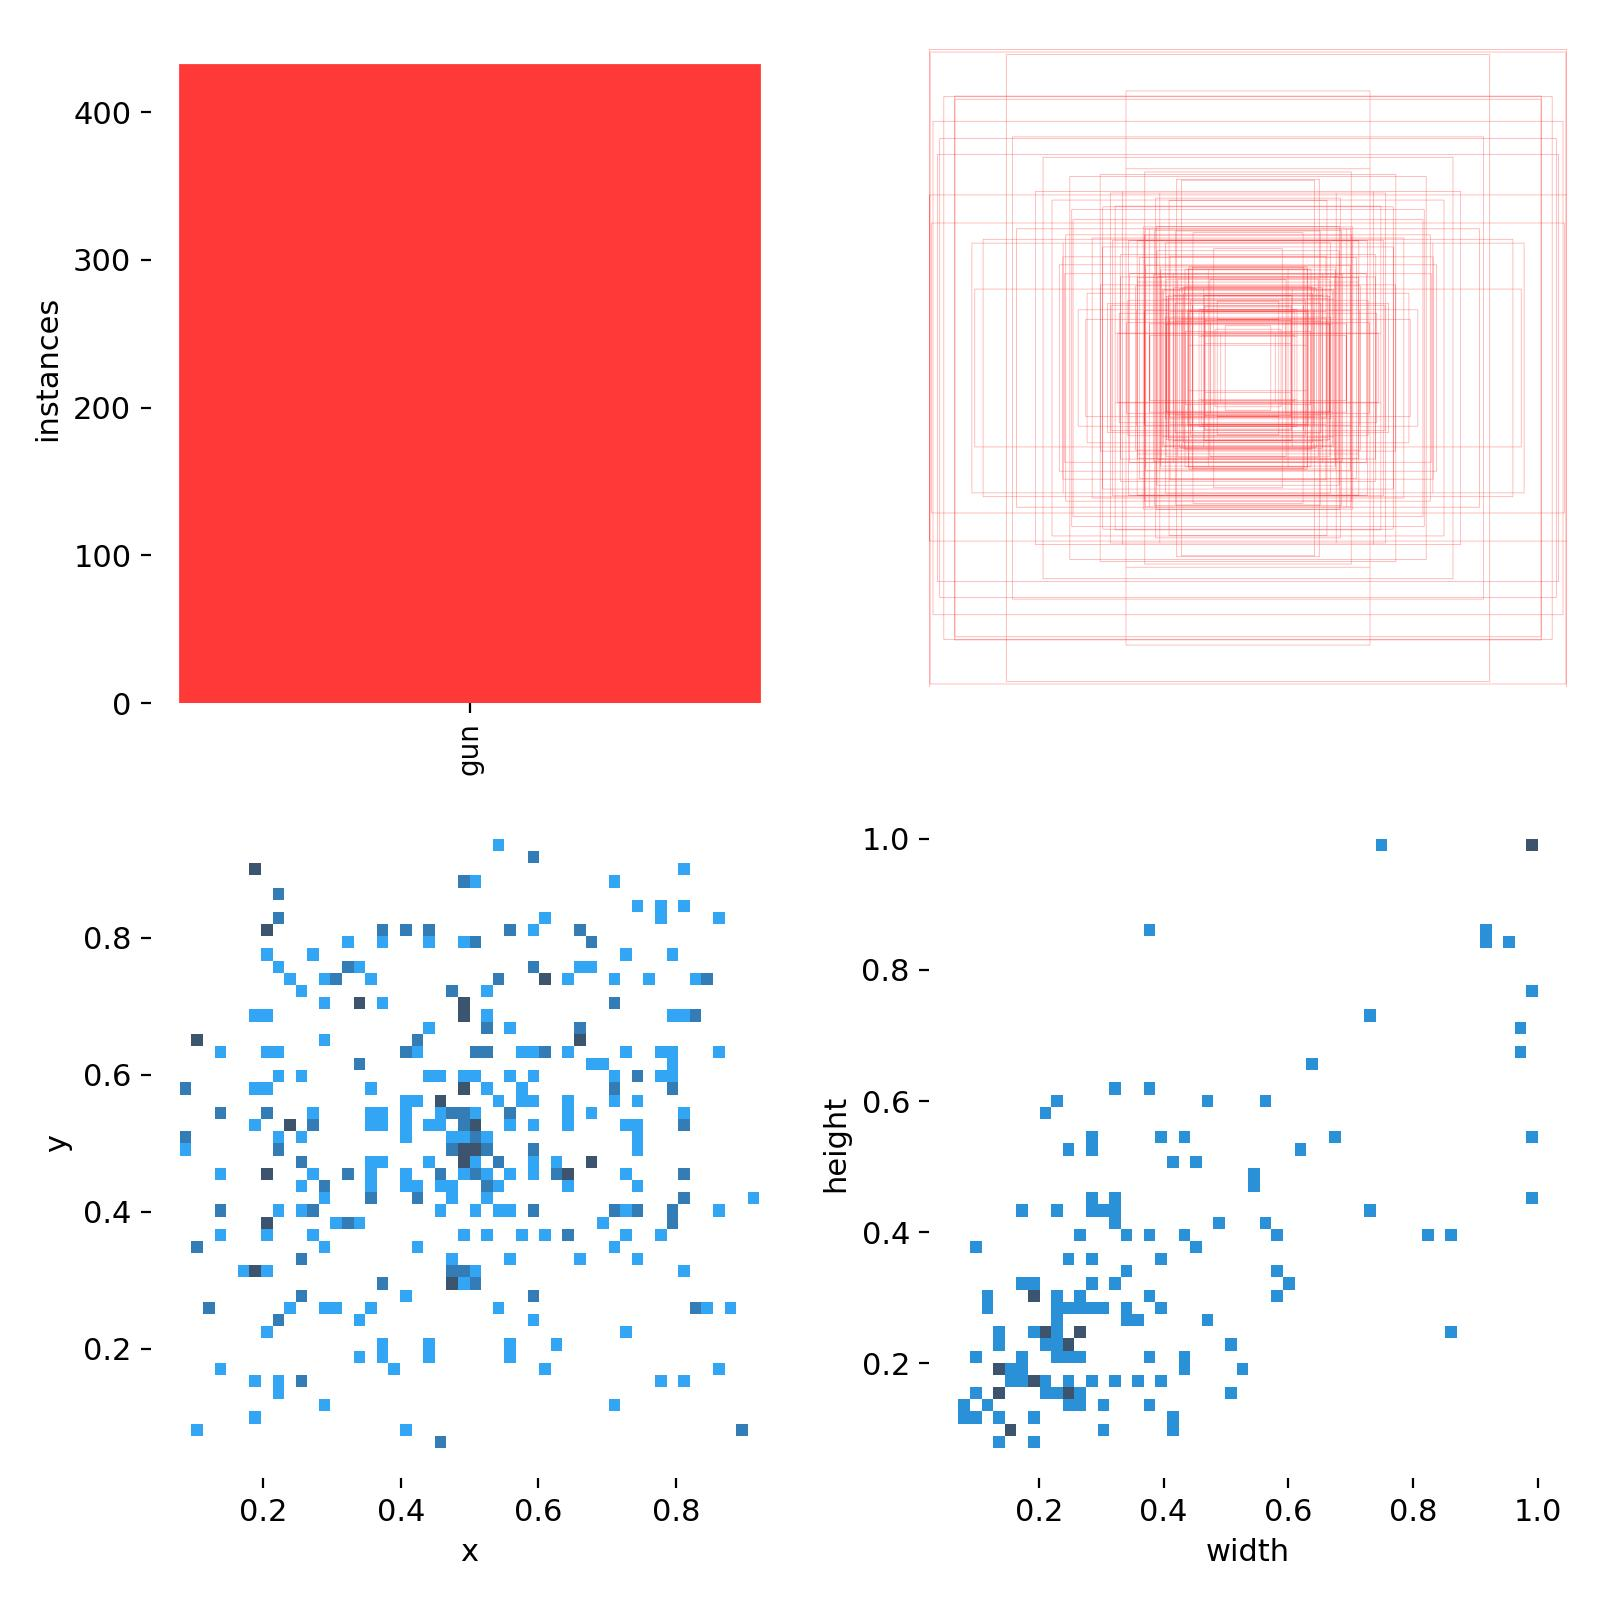

In [5]:
Image(filename=f"/content/yolov9/runs/train/exp/labels.jpg", width=1000)

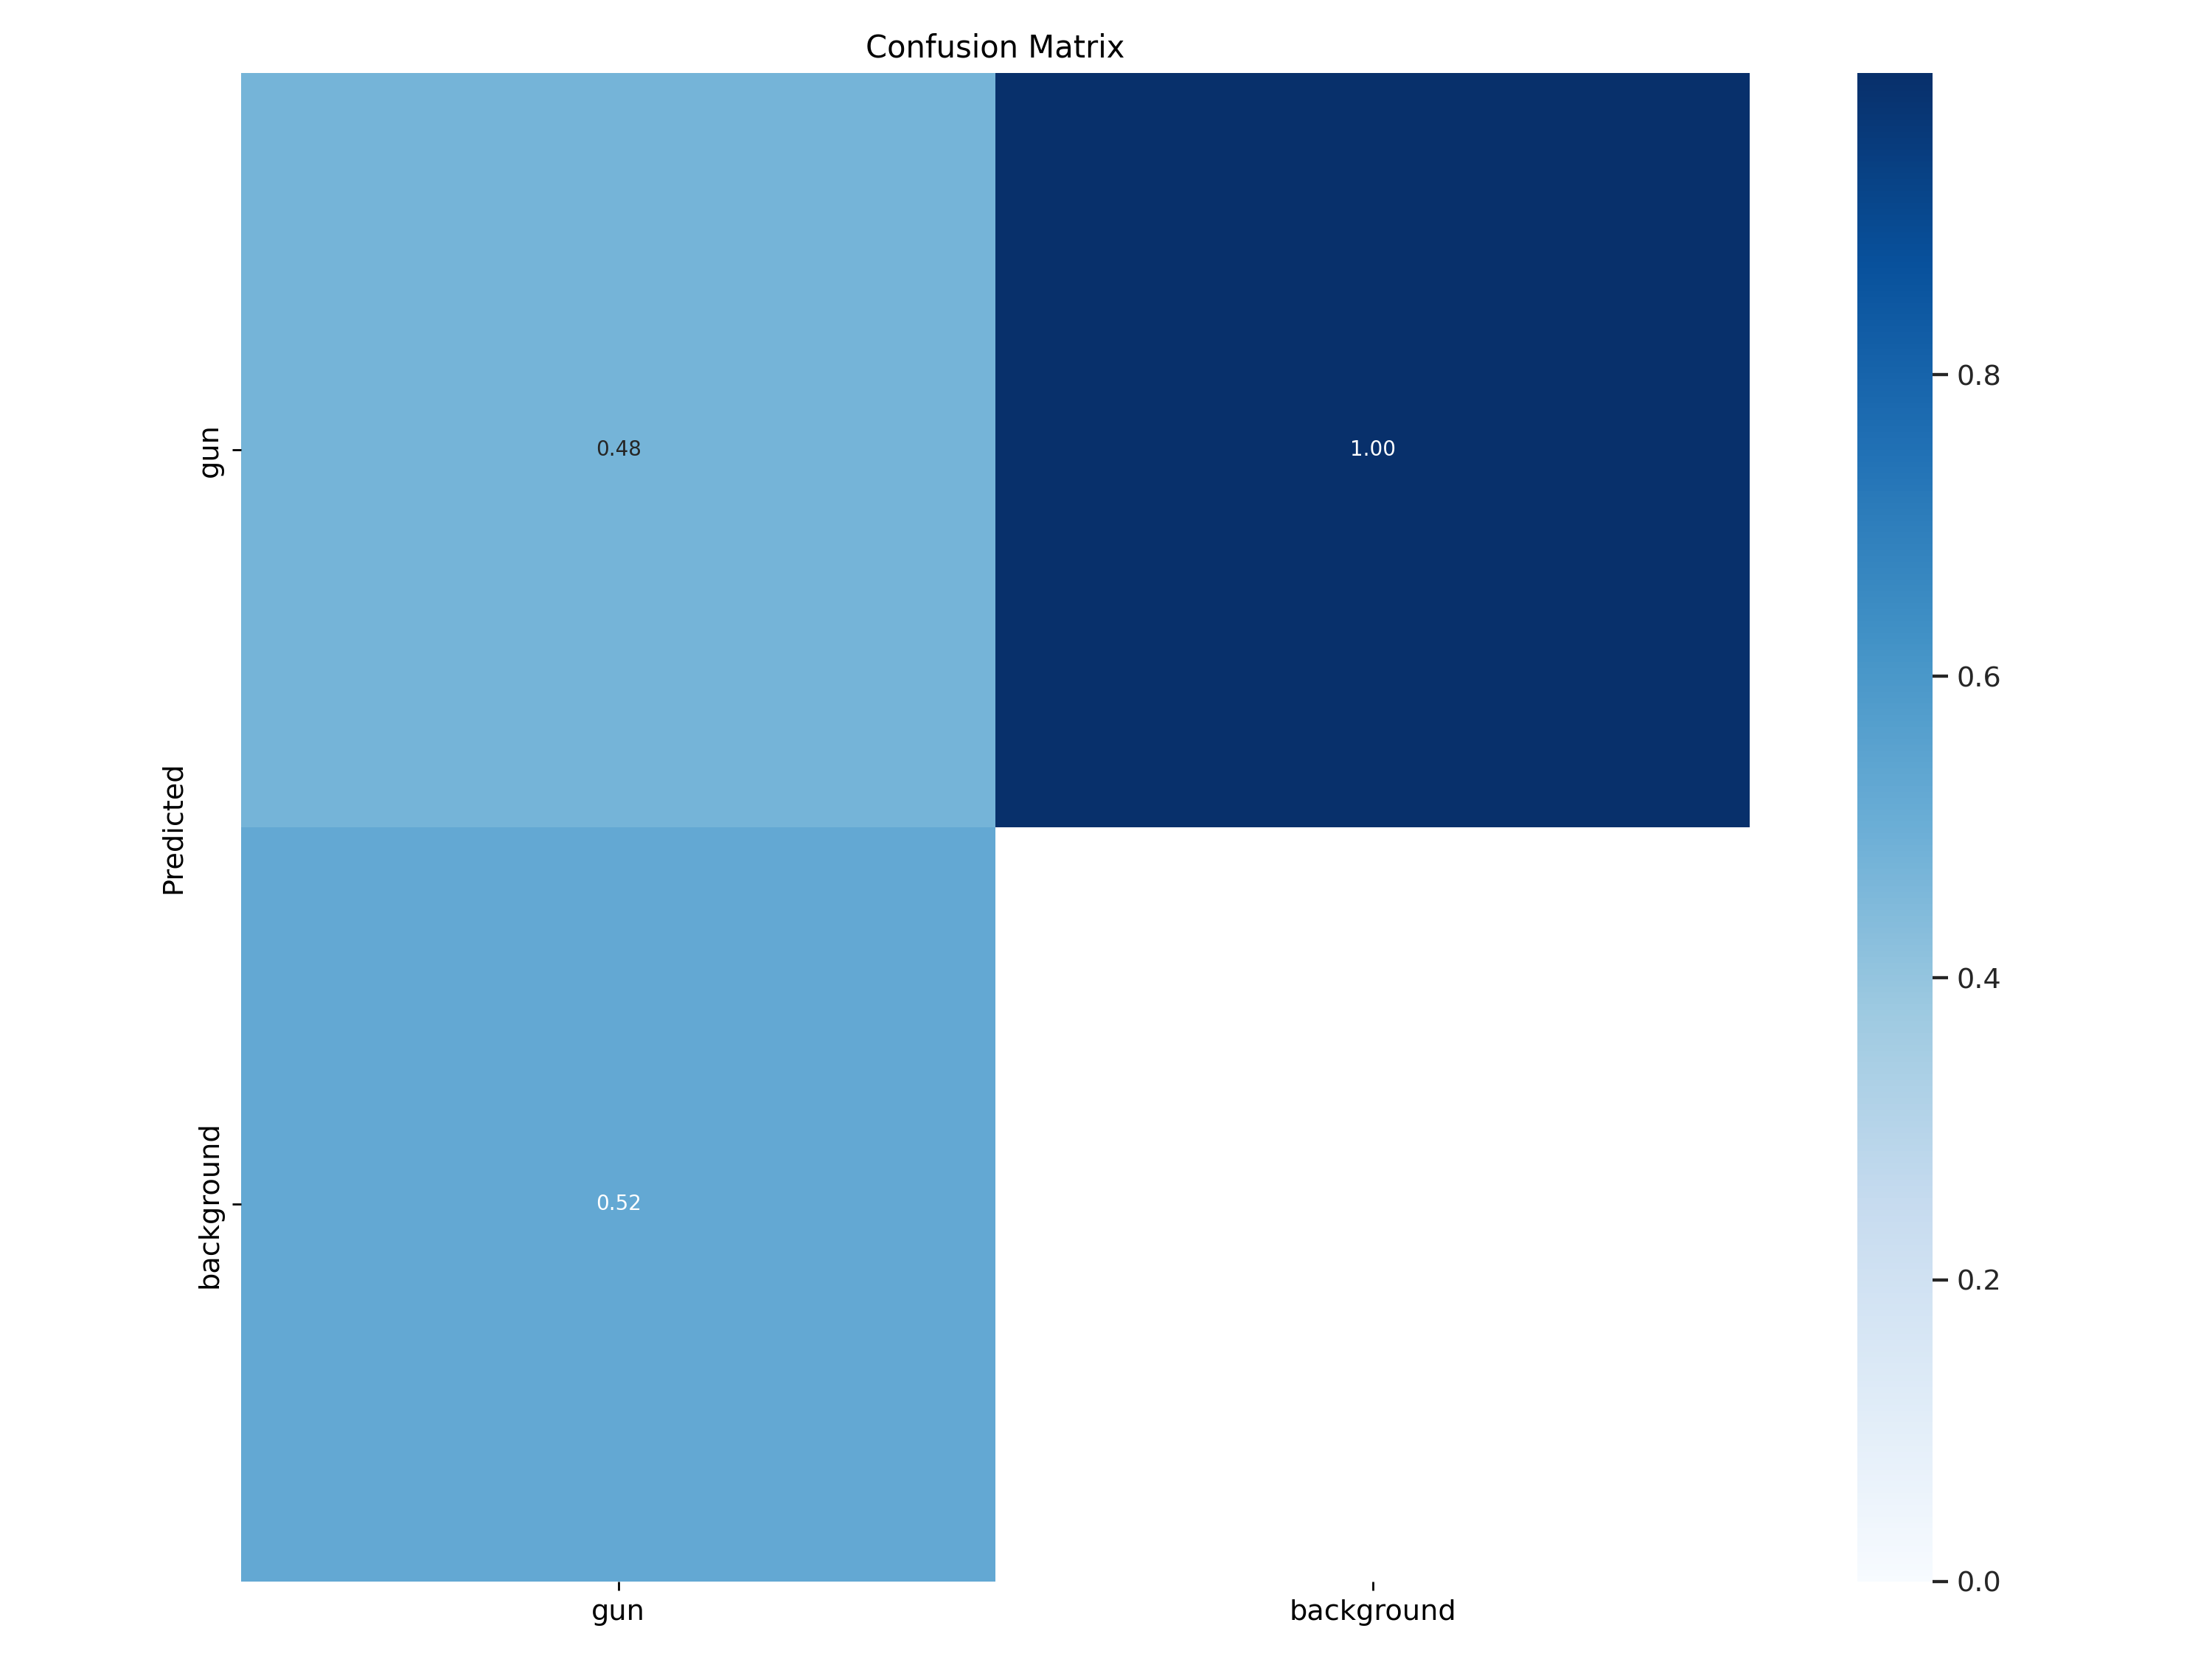

In [6]:
Image(filename=f"/content/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

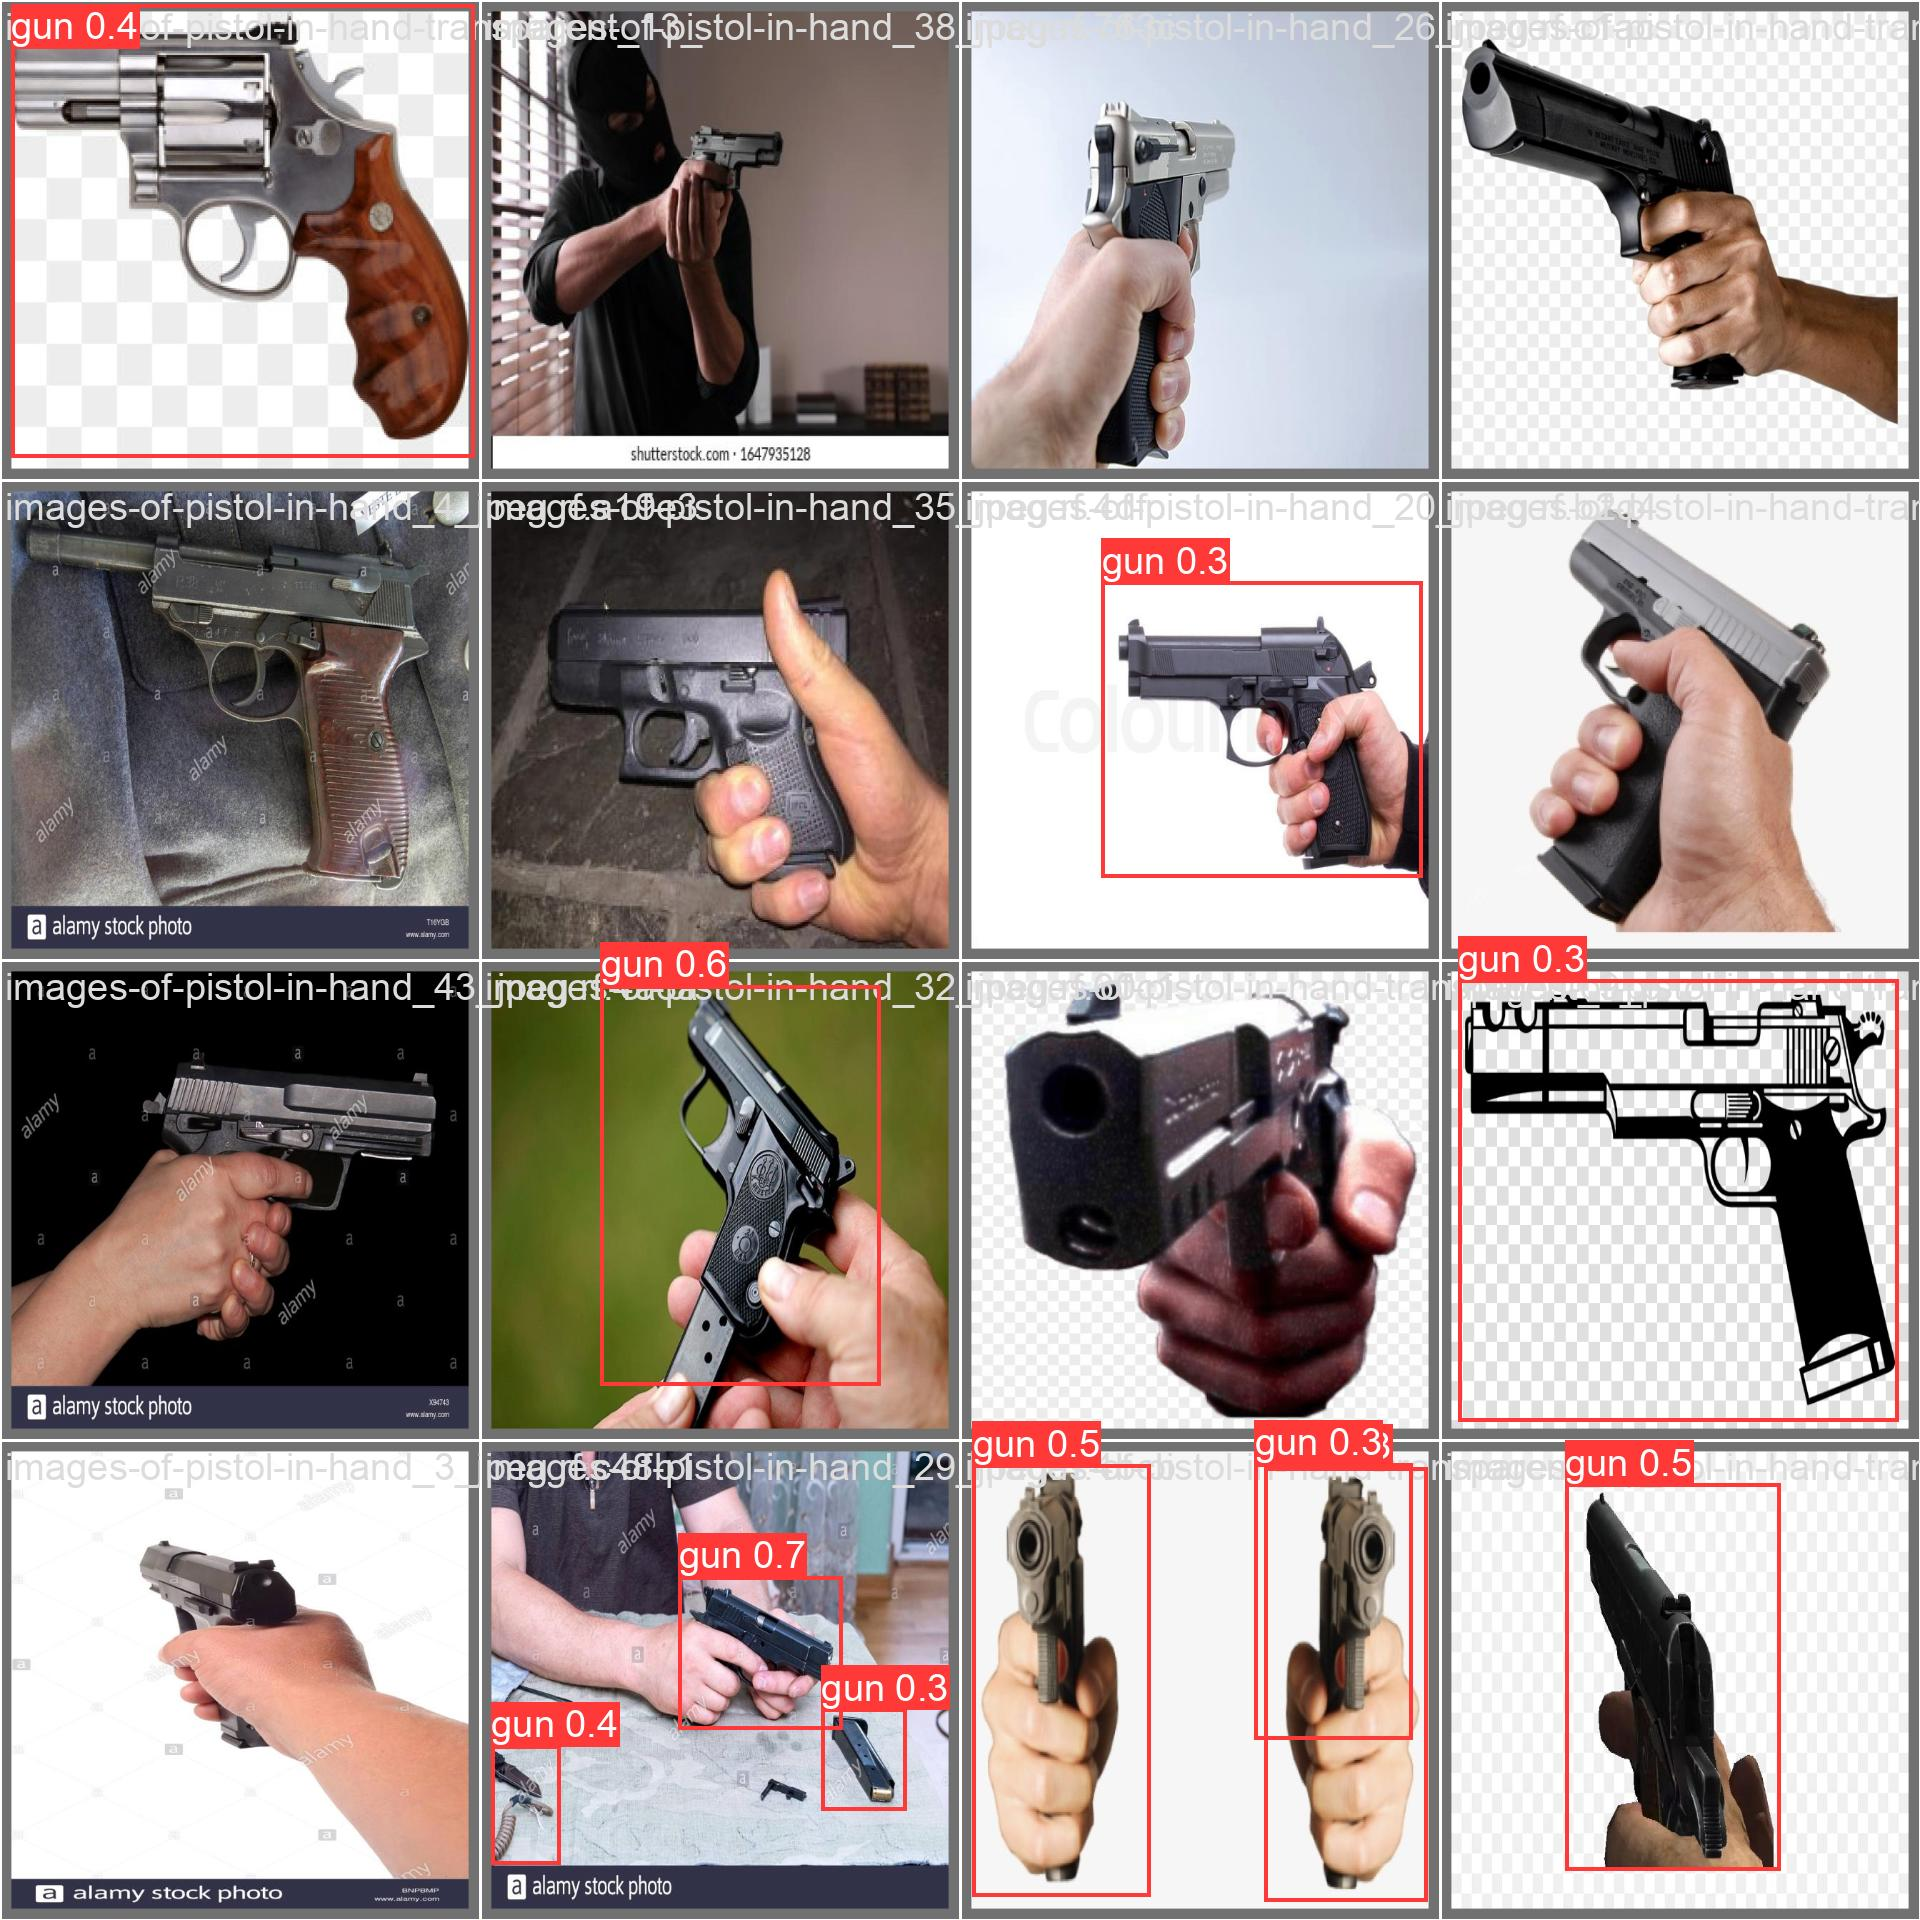

In [7]:
Image(filename=f"/content/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

# **Run inference with custom model**

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights /content/yolov9/runs/train/exp/weights/best.pt \
--source /content/yolov9/Gun-Surveilence-V2-1/valid/images